In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

In [27]:
## Data Preprocessing
def preprocess_data(data):
    data["Datetime"]=pd.to_datetime(data["Datetime"])
    data["SMA"]=pd.to_numeric(data["SMA"])
    data=data.dropna()
    data.sort_values(by="Datetime",inplace=True)
    scaler=StandardScaler()
    data["SMA"]=scaler.fit_transform(data[["SMA"]])
    return data

In [14]:
## Feature Extraction
def extract_features(data):
    data["SMA_change"]=data["SMA"].diff().fillna(0)
    data["SMA_change_abs"]=data["SMA_change"].abs()
    data["SMA_change_rate"]=data["SMA_change"].diff().fillna(0)
    return data

In [15]:
##Maneuver Detection
def detect_maneuver(data):
    threshold=data["SMA_change_abs"].std()*3
    data["Maneuver"]=data["SMA_change_abs"]>threshold
    return data
    

In [34]:
## data visualization
def visualize_data(data):
    plt.figure(figsize=(14,7))
    plt.plot(data["Datetime"],data["SMA"],label="SMA")
    plt.scatter(data[data["Maneuver"]]["Datetime"],data[data["Maneuver"]]["SMA"],color="red",label="Maneuver")
    plt.xlabel("Datetime")
    plt.ylabel("SMA")
    plt.title("Maneuver Detection")
    plt.legend()
    plt.show()

In [29]:
def main():
    data=pd.read_csv("SMA_data.csv")

In [30]:
preprocess_data(data)

,Datetime,SMA
0,2018-01-01 04:34:10.320672,-0.686910
1,2018-01-01 12:37:36.596064,-0.687333
2,2018-01-01 20:31:55.898112,-0.687587
3,2018-01-02 05:42:49.014720,-0.688447
4,2018-01-02 12:13:01.263360,-0.688934
...,...,...
2286,2019-12-30 03:03:24.992640,1.251191
2287,2019-12-30 11:05:46.768704,1.250809
2288,2019-12-30 19:01:25.464576,1.250519
2289,2019-12-31 10:44:01.110912,1.249684


In [31]:
extract_features(data)

,Datetime,SMA,SMA_change,SMA_change_abs,SMA_change_rate
0,2018-01-01 04:34:10.320672,6864.691463,0.000000,0.000000,0.000000
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0.001799,-0.001799
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0.001079,0.000720
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0.003658,-0.002578
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0.002069,0.001589
...,...,...,...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137,-0.001594,0.001594,-0.000180
2287,2019-12-30 11:05:46.768704,6872.928514,-0.001624,0.001624,-0.000030
2288,2019-12-30 19:01:25.464576,6872.927281,-0.001233,0.001233,0.000391
2289,2019-12-31 10:44:01.110912,6872.923732,-0.003548,0.003548,-0.002316


In [32]:
 detect_maneuver(data)

,Datetime,SMA,SMA_change,SMA_change_abs,SMA_change_rate,Maneuver
0,2018-01-01 04:34:10.320672,6864.691463,0.000000,0.000000,0.000000,False
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0.001799,-0.001799,False
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0.001079,0.000720,False
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0.003658,-0.002578,False
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0.002069,0.001589,False
...,...,...,...,...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137,-0.001594,0.001594,-0.000180,False
2287,2019-12-30 11:05:46.768704,6872.928514,-0.001624,0.001624,-0.000030,False
2288,2019-12-30 19:01:25.464576,6872.927281,-0.001233,0.001233,0.000391,False
2289,2019-12-31 10:44:01.110912,6872.923732,-0.003548,0.003548,-0.002316,False


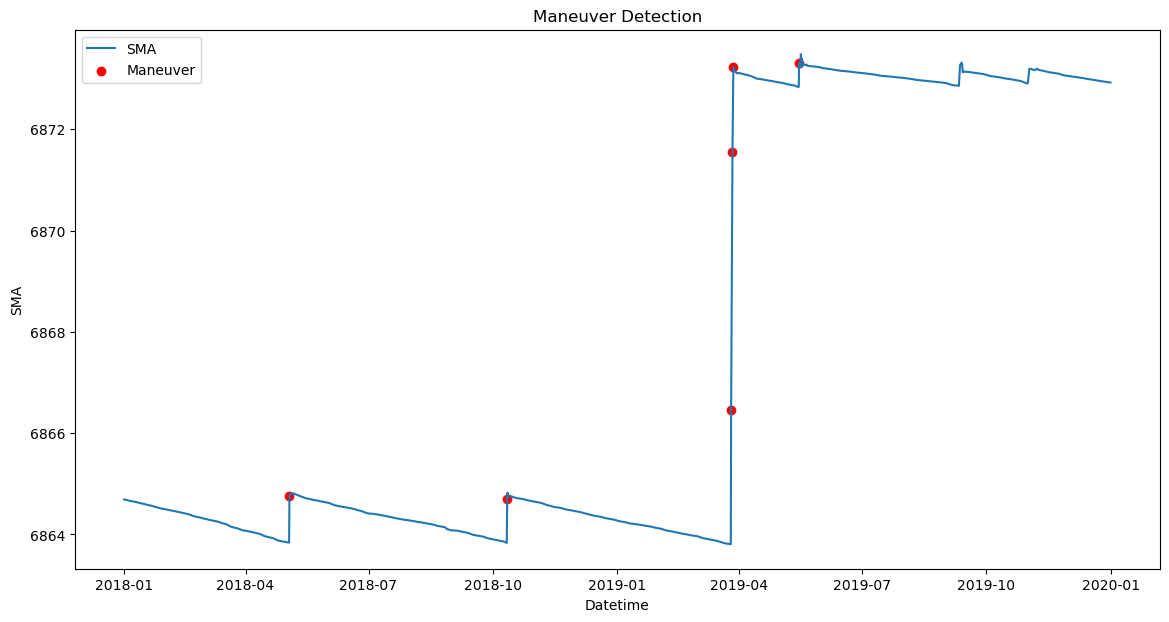

In [35]:
visualize_data(data)

In [37]:
if __name__== "__main__":
    main()

In [48]:
Maneuver_dates=pd.DataFrame(data[data["Maneuver"]]["Datetime"])

In [49]:
Maneuver_dates

,Datetime
384,2018-05-03 12:01:31.056960
871,2018-10-11 13:37:04.556640
1421,2019-03-26 04:53:33.243936
1422,2019-03-27 04:34:36.436800
1423,2019-03-27 20:25:37.599168
1583,2019-05-15 10:44:36.864096
